# So, you want to get into airplanes?

* Phase 1 Project
* Mohammad Abou-Ghazala
* __Instructor__: Mark Barbour
* __Pace__: Flex

## Overview

This project analyzes data surrounding tens of thousands of recorded aircraft crashes in order to make a series of recommendations for a company looking to acquire airplanes for commercial and private enterprise use, as this company is in need of guidance as to what constitutes a relatively safe airplane. 

This dataset, found on Kaggle, contains data on aircraft accidents from as far back as the 1940s and includes all types of aircrafts, models, and makes. 

## Business Problem

Due to the sheer number of recorded incidents/accidents recorded in this dataset, it is imperative to come up with a comprehensive criteria with which to provide the business recommendations. While it may be tempting to simply look for the airplane models that have the least recurrence of crashes, this would be a mistake as it fails to consider that certain makes or models are used more widely and therefore would have higher occurences of crashes.

Instead, I will search for which airplanes, on average, have the lowest rates of severe damage and injuries, using the following categories:
- Number of Engines
- Type of Engine
- Make of Airplane
- Injury Severity
- Total Injuries (Fatal, Serious, Minor)
- Aircraft Damage Severity

### _Confounding Factors_

There are a number of factors that are not accounted for in the dataset that could potentially inform the analysis of the data, namely:  

1. The experience and talent of the pilots operating the aircrafts.
2. The maintenance policies of the airlines towards the aircrafts.
3. Age of the aircraft.

## Data Preparation

To begin, I import the Pandas and Mat Plot Libraries. The raw data is in  CSV file, so I use Pandas to open the file as "df" and take a cursory look before cleaning the dataset.

In [5]:
# Importing necessary libraries

import pandas as pd
import matplotlib.pyplot as plt

/var/folders/kc/5d_pp5b57l9cv1n38nnw2p7r0000gn/T/ipykernel_35473/1013273076.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [6]:
# Loading and inspecting the Dataframe using Pandas

df = pd.read_csv('AviationData.csv', encoding = 'latin1')
df

/var/folders/kc/5d_pp5b57l9cv1n38nnw2p7r0000gn/T/ipykernel_35473/192179163.py:3: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('AviationData.csv', encoding = 'latin1')


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


## Data Cleaning

To begin cleaning the dataset, which is saved to "df_clean," I remove unnecessary columns that contain data that is not relevant to the business problem, such as the Event ID, the type of investigation, the accident number, and location and date of the accident.

Then, I remove all rows that are missing critical data that would skew the analysis according to the criteria outlined above. I also remove entries for aircraft other than airplanes or of an amateur make.

In [7]:
# Removing unnecessary columns

df_clean = df.drop(columns = ['Event.Id', 'Investigation.Type', 'Accident.Number', 
                              'Event.Date', 'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code', 
                              'Airport.Name', 'Registration.Number', 'Schedule', 'Purpose.of.flight', 'Air.carrier', 
                              'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status', 'Publication.Date'])
df_clean

,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
0,Fatal(2),Destroyed,NaN,Stinson,108-3,No,1.0,Reciprocating,NaN,2.0,0.0,0.0,0.0
1,Fatal(4),Destroyed,NaN,Piper,PA24-180,No,1.0,Reciprocating,NaN,4.0,0.0,0.0,0.0
2,Fatal(3),Destroyed,NaN,Cessna,172M,No,1.0,Reciprocating,NaN,3.0,NaN,NaN,NaN
3,Fatal(2),Destroyed,NaN,Rockwell,112,No,1.0,Reciprocating,NaN,2.0,0.0,0.0,0.0
4,Fatal(1),Destroyed,NaN,Cessna,501,No,NaN,NaN,NaN,1.0,2.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,Minor,NaN,NaN,PIPER,PA-28-151,No,NaN,NaN,091,0.0,1.0,0.0,0.0
88885,NaN,NaN,NaN,BELLANCA,7ECA,No,NaN,NaN,NaN,0.0,0.0,0.0,0.0
88886,Non-Fatal,Substantial,Airplane,AMERICAN CHAMPION AIRCRAFT,8GCBC,No,1.0,NaN,091,0.0,0.0,0.0,1.0
88887,NaN,NaN,NaN,CESSNA,210N,No,NaN,NaN,091,0.0,0.0,0.0,0.0


In [8]:
# Removing rows missing critical data

df_clean = df_clean.dropna(subset = ['Number.of.Engines', 'Engine.Type', 'Injury.Severity', 
                                     'Aircraft.damage', 'Total.Fatal.Injuries',
                                    'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']) 
df_clean.head(10)

,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
0,Fatal(2),Destroyed,NaN,Stinson,108-3,No,1.0,Reciprocating,NaN,2.0,0.0,0.0,0.0
1,Fatal(4),Destroyed,NaN,Piper,PA24-180,No,1.0,Reciprocating,NaN,4.0,0.0,0.0,0.0
3,Fatal(2),Destroyed,NaN,Rockwell,112,No,1.0,Reciprocating,NaN,2.0,0.0,0.0,0.0
6,Fatal(4),Destroyed,NaN,Cessna,180,No,1.0,Reciprocating,NaN,4.0,0.0,0.0,0.0
7,Non-Fatal,Substantial,Airplane,Cessna,140,No,1.0,Reciprocating,Part 91: General Aviation,0.0,0.0,0.0,2.0
8,Non-Fatal,Substantial,Airplane,Cessna,401B,No,2.0,Reciprocating,Part 91: General Aviation,0.0,0.0,0.0,2.0
9,Non-Fatal,Substantial,NaN,North American,NAVION L-17B,No,1.0,Reciprocating,NaN,0.0,0.0,3.0,0.0
10,Non-Fatal,Substantial,NaN,Piper,PA-28-161,No,1.0,Reciprocating,NaN,0.0,0.0,0.0,1.0
11,Non-Fatal,Substantial,NaN,Beech,V35B,No,1.0,Reciprocating,NaN,0.0,0.0,0.0,1.0
12,Non-Fatal,Destroyed,Airplane,Bellanca,17-30A,No,1.0,Reciprocating,Part 91: General Aviation,0.0,0.0,1.0,0.0


In [9]:
# Inspecting the distribution of the types of aircraft covered in the dataset

df_clean['Aircraft.Category'].value_counts()

Aircraft.Category
Airplane             19001
Helicopter            2224
Weight-Shift           139
Gyrocraft              134
Glider                 120
Powered Parachute       81
Balloon                 24
Ultralight              17
Unknown                  3
Rocket                   1
Blimp                    1
WSFT                     1
Name: count, dtype: int64

In [10]:
# Removing all rows containing data for aircraft other than 'Airplane'

df_clean = df_clean[df_clean['Aircraft.Category'] == 'Airplane']
df_clean['Aircraft.Category'].value_counts()

Aircraft.Category
Airplane    19001
Name: count, dtype: int64

In [11]:
# Saving this cleaned dataset

df_clean.to_csv('df_clean.csv', index=False)

## Quantifying Damage Severity

Since the only columns that describe the extent of the damage of the crash are in qualitative terms, I translate this qualitative data into quantitative data by using Lambda functions to assign "True" value to the entries listed as "substantial" or "destroyed" and create a new column for this new data. I then turn these entries into numbers by assigning "1" for "True," and "0" for "False." 

This way, I can calculate the averages of these entries and determine which aircrafts have lower rates of severe damage.

In [12]:
# Using lambda function to assign "True" value to 'Substantial' and 'Destroyed' measures of Aircraft Damage

df_clean['Aircraft.damage'].apply(lambda x: x in ['Substantial', 'Destroyed'])

7        True
8        True
12       True
13       True
14       True
         ... 
88639    True
88647    True
88661    True
88735    True
88767    True
Name: Aircraft.damage, Length: 19001, dtype: bool

In [13]:
# Creating new column for 'Damage Binary'

df_clean['Dmg.binary'] = df_clean['Aircraft.damage'].apply(lambda x: x in ['Substantial', 'Destroyed'])
df_clean['Dmg.binary'].value_counts()

Dmg.binary
True     18548
False      453
Name: count, dtype: int64

In [14]:
# Turning values of "Damage Binary" column into integers

df_clean['Dmg.binary'] = df_clean['Dmg.binary'].apply(int)

## Creating New Dataframes

Now that I have this new "Damage Binary" column, I create new dataframes from the original "df_clean" in order to more efficiently investigate the link between higher/lower damage rates and the characteristics of the aircrafts.

I do this by narrowing the data down to "Engine Type" and "Number of Engines."

In [15]:
# Creating a new dataframe to investigate relationship between Engine Type and Damage Binary

dfb_engine = df_clean.groupby('Engine.Type')['Dmg.binary'].mean()

# Saving the new dataframe

dfb_engine.to_csv('Engine_Damage_Binary.csv', index=False)

In [16]:
dfb_engine

Engine.Type
Electric           1.000000
Geared Turbofan    0.000000
Reciprocating      0.987885
Turbo Fan          0.669683
Turbo Jet          0.803738
Turbo Prop         0.932966
Turbo Shaft        0.833333
UNK                1.000000
Unknown            0.941176
Name: Dmg.binary, dtype: float64

In [17]:
# New dataframe for relationship between the Number of Engines and Damage Binary

dfb_engine_number = df_clean.groupby('Number.of.Engines')['Dmg.binary'].mean()
dfb_engine_number

Number.of.Engines
0.0    1.000000
1.0    0.989104
2.0    0.890282
3.0    0.480000
4.0    0.648649
8.0    1.000000
Name: Dmg.binary, dtype: float64

In [18]:
# Saving the new dataframe

dfb_engine_number.to_csv('Engine_Number_Damage_Binary.csv', index=False)

In [19]:
df_engine_number = df_clean.loc[:,['Number.of.Engines','Dmg.binary']]
df_engine_number.to_csv('Engine_Number_Damage_Binary.csv', index=False)

## Updating df_clean Dataframes

There remains a number of changes that need to be made in order to make investigation efficient. 

* First, I convert the "Number of Engines" column into strings as they are categorical variables for the purposes of this project.

* Second, I standardize the spelling and naming of the entries under the "Make" column to ensure accurate data reporting and analysis.

* With these updated data, I create a new dataframe to better investigate the Make of the aircraft. 

In [20]:
# Changing values of Number of Engines in df_clean to strings

df_clean['Number.of.Engines'] = df_clean['Number.of.Engines'].apply(str)

# Saving updated df_clean dataframe

df_clean.to_csv('df_clean.csv', index=False)

In [21]:
df_clean['Number.of.Engines'].info

<bound method Series.info of 7        1.0
8        2.0
12       1.0
13       1.0
14       1.0
        ... 
88639    1.0
88647    1.0
88661    2.0
88735    1.0
88767    1.0
Name: Number.of.Engines, Length: 19001, dtype: object>

In [22]:
# Standardizing the names under 'Make' column

df_clean['Make'] = df_clean['Make'].str.upper()
df_clean['Make'].value_counts()

Make
CESSNA               6130
PIPER                3557
BEECH                1210
MOONEY                306
BOEING                226
                     ... 
HAWKER-BEECHCRAFT       1
WALKER J C              1
CLAUS RODNEY L          1
AVIAT AIRCRAFT          1
STEPHEN J HOFFMAN       1
Name: count, Length: 2774, dtype: int64

In [23]:
# Creating new dataframe with all engine-related information, the make of the aircraft, and damage binary

df_clean_engine = df_clean.loc[:, ['Number.of.Engines', 'Engine.Type', 'Make', 'Dmg.binary']]

In [24]:
# Ensuring the data under Number of Engines column are strings

df_clean_engine['Number.of.Engines'] = df_clean_engine['Number.of.Engines'].astype(str)
df_clean_engine['Number.of.Engines'].dtypes

dtype('O')

In [25]:
# Saving new dataframe

df_clean_engine.to_csv('df_clean_engine.csv', index=False)

In [26]:
# Creating new dataframe using loc function

df_clean_make_engine = df_clean_engine.loc[:, ['Make', 'Dmg.binary', 'Engine.Type', 'Number.of.Engines']]

In [27]:
df_clean_make_engine['Make'].value_counts()

Make
CESSNA               6130
PIPER                3557
BEECH                1210
MOONEY                306
BOEING                226
                     ... 
HAWKER-BEECHCRAFT       1
WALKER J C              1
CLAUS RODNEY L          1
AVIAT AIRCRAFT          1
STEPHEN J HOFFMAN       1
Name: count, Length: 2774, dtype: int64

In [28]:
df_clean_engine['Make'].head(30)

7          CESSNA
8          CESSNA
12       BELLANCA
13         CESSNA
14         NAVION
15          BEECH
17         CESSNA
18         CESSNA
20         CESSNA
21         CESSNA
23          PIPER
24        GRUMMAN
25         CESSNA
26     BEECHCRAFT
27          MAULE
28         CESSNA
29       BELLANCA
30         CESSNA
31    AIR TRACTOR
32          PIPER
33          PIPER
34         CESSNA
35          PIPER
36         CESSNA
37         NAVION
38          PIPER
39          PIPER
40       ROCKWELL
41          PIPER
42          PIPER
Name: Make, dtype: object

In [29]:
# Adding Event Date data to df_clean

df_clean['Event.Date'] = df['Event.Date']

In [30]:
df_clean

,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Dmg.binary,Event.Date
7,Non-Fatal,Substantial,Airplane,CESSNA,140,No,1.0,Reciprocating,Part 91: General Aviation,0.0,0.0,0.0,2.0,1,1982-01-01
8,Non-Fatal,Substantial,Airplane,CESSNA,401B,No,2.0,Reciprocating,Part 91: General Aviation,0.0,0.0,0.0,2.0,1,1982-01-01
12,Non-Fatal,Destroyed,Airplane,BELLANCA,17-30A,No,1.0,Reciprocating,Part 91: General Aviation,0.0,0.0,1.0,0.0,1,1982-01-02
13,Fatal(1),Destroyed,Airplane,CESSNA,R172K,No,1.0,Reciprocating,Part 91: General Aviation,1.0,0.0,0.0,0.0,1,1982-01-02
14,Fatal(1),Destroyed,Airplane,NAVION,A,No,1.0,Reciprocating,Part 91: General Aviation,1.0,0.0,0.0,0.0,1,1982-01-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88639,Non-Fatal,Substantial,Airplane,CESSNA,150,No,1.0,Reciprocating,091,0.0,0.0,0.0,1.0,1,2022-10-06
88647,Non-Fatal,Substantial,Airplane,CESSNA,177RG,No,1.0,Reciprocating,091,0.0,0.0,0.0,2.0,1,2022-10-08
88661,Non-Fatal,Substantial,Airplane,BEECH,B-60,No,2.0,Reciprocating,091,0.0,0.0,0.0,1.0,1,2022-10-13
88735,Minor,Substantial,Airplane,STEPHEN J HOFFMAN,MS-500,Yes,1.0,Reciprocating,091,0.0,1.0,0.0,0.0,1,2022-10-29


In [31]:
# Saving updated dataframe

df_clean_date = df_clean
df_clean_date.to_csv('df_clean_date.csv', index=False)

## Applying Visualizations

To begin applying visualizations, I create a test dataset to plot look at the relationship between the Number of Engines on an aircraft with the average Damage Severity associated with those aircrafts.

In [59]:
# Create test dataset by pulling two columns from the cleaned datafram above

df_test = df_clean.loc[:, ['Number.of.Engines', 'Dmg.binary']]
df_test

,Number.of.Engines,Dmg.binary
7,1.0,1
8,2.0,1
12,1.0,1
13,1.0,1
14,1.0,1
...,...,...
88639,1.0,1
88647,1.0,1
88661,2.0,1
88735,1.0,1


In [65]:
# Use this test dataset to create variables to be used in the bar graph below

top_engines = df_test['Number.of.Engines'].value_counts().head(5).index

df_test_filtered = df_test[df_test['Number.of.Engines'].isin(top_engines)]
dmg_mean = df_test_filtered.groupby('Number.of.Engines')['Dmg.binary'].mean()

dmg_mean.index

Index(['0.0', '1.0', '2.0', '3.0', '4.0'], dtype='object', name='Number.of.Engines')

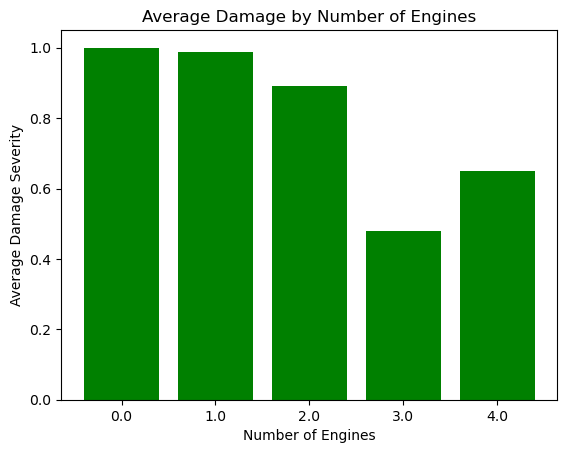

In [79]:
# Creating the Bar Graph

import matplotlib.pyplot as plt

fig, ax = plt.subplots()

x = dmg_mean.index
y = dmg_mean.values

ax.bar(x, y, color='green')

ax.set_xlabel('Number of Engines')
ax.set_ylabel('Average Damage Severity')
ax.set_title('Average Damage by Number of Engines')

plt.show()

In [73]:
# Creating new dataset to test the relationship between type of engine and total uninjured in crashes

engine_type = df_clean['Engine.Type'].value_counts().head(4).index

engine_type_filtered = df_clean[df_clean['Engine.Type'].isin(engine_type)]
total_uninjured = engine_type_filtered.groupby('Engine.Type')['Total.Uninjured'].sum()
total_uninjured

Engine.Type
Reciprocating    18325.0
Turbo Fan        27440.0
Turbo Jet         2462.0
Turbo Prop        2625.0
Name: Total.Uninjured, dtype: float64

<BarContainer object of 4 artists>

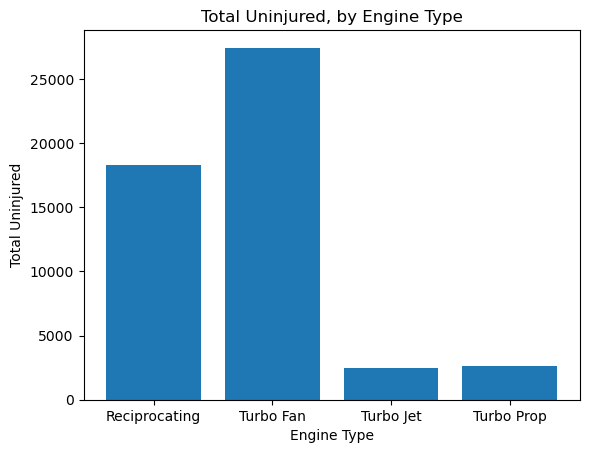

In [75]:
# Plotting the new graph

fig, ax = plt.subplots()

x = total_uninjured.index
y = total_uninjured.values

ax.set_title('Total Uninjured, by Engine Type')
ax.set_xlabel('Engine Type')
ax.set_ylabel('Total Uninjured')

ax.bar(x, y)

In [76]:
total_serious_injuries = engine_type_filtered.groupby('Engine.Type')['Total.Serious.Injuries'].sum()

Text(0, 0.5, 'Total Serious Injuries')

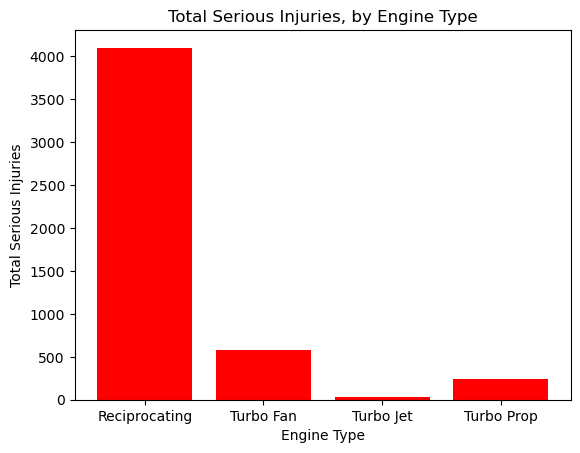

In [80]:
# Charting the relationship between total serious injuries by the type of engine

fig, ax = plt.subplots()

x = total_serious_injuries.index
y = total_serious_injuries.values

ax.bar(x,y, color='red')

ax.set_title('Total Serious Injuries, by Engine Type')
ax.set_xlabel('Engine Type')
ax.set_ylabel('Total Serious Injuries')

Using the dataframes outlined in the previous section, I utilize Tableau Public in order to create visualizations to better grapple with the connections between number of engines, the type of engine, and make of the airplane. I specifically looked at the data corresponding to the most recurring aircraft and engine types.

In [31]:
%%HTML
<div class='tableauPlaceholder' id='viz1724874339047' style='position: relative'><noscript><a href='#'>
<img alt='Dashboard 1 ' 
src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ph&#47;Phase1Project-TotalofInjuriesandUninjured&#47;Dashboard1&#47;1_rss.png' 
style='border: none' /></a></noscript><object class='tableauViz'  
style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> 
<param name='embed_code_version' value='3' /> <param name='site_root' value='' />
<param name='name' value='Phase1Project-TotalofInjuriesandUninjured&#47;Dashboard1' />
<param name='tabs' value='no' /><param name='toolbar' value='yes' />
<param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ph&#47;Phase1Project-TotalofInjuriesandUninjured&#47;Dashboard1&#47;1.png' /> 
<param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1724874339047');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.minWidth='420px';vizElement.style.maxWidth='650px';vizElement.style.width='100%';vizElement.style.minHeight='587px';vizElement.style.maxHeight='887px';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.minWidth='420px';vizElement.style.maxWidth='650px';vizElement.style.width='100%';vizElement.style.minHeight='587px';vizElement.style.maxHeight='887px';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';} else { vizElement.style.width='100%';vizElement.style.height='927px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    
vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

1. The Turbofan Engine Type has the lowest rates of injuries
2. The aircrafts with 3 or 4 engines have the lowest rates of severe damage
3. The Cessna make of airplane with 4 engines have the lowest rates of severe damage

## Summary & Recommendations

Upon investigating the cleaned data, a few clear connections can be seen, as demonstrated above. 

According to these findings, I recommend the following guidance when considering new investments in airplanes:
1. Acquiring Cessna airplanes with 4 Turbofan engines is the safest option
2. Avoiding Reciprocating engine types
3. Acquiring an aircraft with at least 2 or more engines